In [1]:
import os # to get current working directory
import numpy as np # to read example data
import trspecfit as trsfit # main module

Create Model

In [ ]:
# create parent project
project = trsfit.Project(path=os.getcwd())
# create file instance
file = trsfit.File(parent_project=project,
                   energy=np.arange(0, 20, 0.01),
                   time=np.arange(-10, 100, 0.1)
                   )

In [3]:
# load energy model
file.load_model(model_yaml='models_energy.yaml',
                model_info=['single_peak',]
                )

Loading model to describe energy- (and time-)dependent data: single_peak


In [ ]:
# add time dependence for one or more parameters
file.add_time_dependence(model_yaml = "models_time.yaml",
                         model_info = ['MonoExpPosIRF',],
                         par_name = "GLP_01_x0"
                         )
# copy the above paragraph to add more time dependencies

Loading model to describe time-dependence of a model parameter: GLP_01_x0 of MonoExpPosIRF model


In [5]:
file.describe_model(model_info=['single_peak',], detail=0)

model name: single_peak
function: GLP from <module 'trspecfit.functions.energy' from 'C:\\Users\\jmahl\\OneDrive\\Documents\\GitHub\\time-resolved-spectroscopy-fit\\src\\trspecfit\\functions\\energy.py'>
all (1D flattened if applicable) lmfit.Parameters(): [sorted alphabetically]
Name                        Value      Min      Max   Stderr     Vary     Expr Brute_Step
GLP_01_A                       10        5       15     None     True     None     None
GLP_01_F                        1     0.75      2.5     None     True     None     None
GLP_01_m                      0.3        0        1     None     True     None     None
GLP_01_x0                      10        5       15     None     True     None     None
GLP_01_x0_expFun_01_A           5        0       15     None     True     None     None
GLP_01_x0_expFun_01_t0          0        0        1     None    False     None     None
GLP_01_x0_expFun_01_tau        50        1      100     None     True     None     None
GLP_01_x0_exp

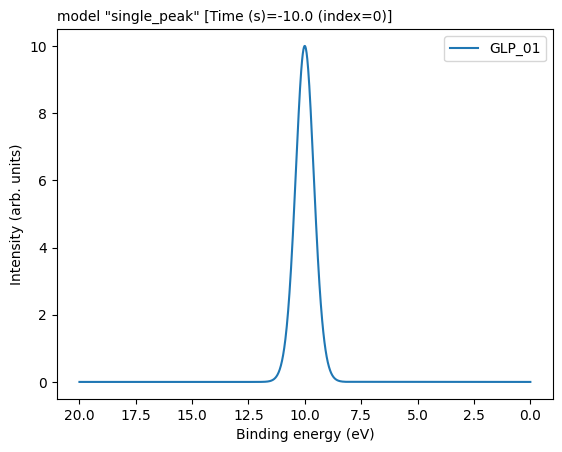

In [15]:
# plot 1D spectrum at a specific time index t_ind
file.model_active.plot_1D(t_ind=0, plt_ind=1)

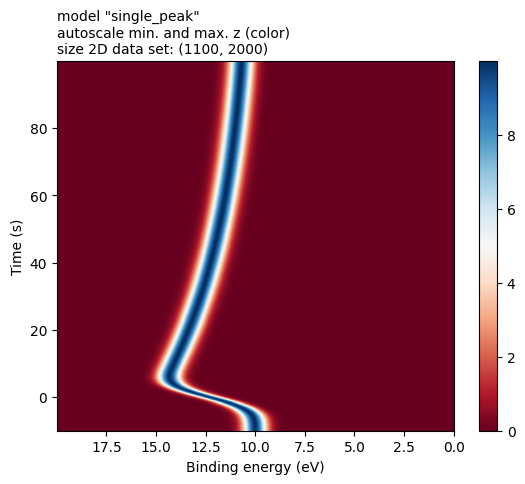

In [16]:
# Show 2D dataset with current model parameters
file.model_active.create_value2D()
file.model_active.plot_2D()

Simulate Noisy Data

In [17]:
# Instantiate simulator
# detection: 'analog'
#     provide noise_level (relative to signal, between 0 and 1)
#     and noise_type ('gaussian' or 'poisson' or 'none')
# detection: 'photon_counting'
#     provide counts_per_cycle (or count_rate and cycle_time)
#     noise_level is relative to counts_per_cycle
#     noise_type is 'poisson' (default) or 'none'
sim = trsfit.Simulator(model=file.model_active,
                       detection='photon_counting',
                       counts_per_cycle=None,
                       seed=42
                    )

Estimating from model: 1.15e+06 counts/cycle
  (average ~0.5 counts/pixel)
For accurate simulation, specify counts_per_cycle or (count_rate, cycle_time).
This estimate assumes your model amplitudes represent realistic count rates.


In [18]:
# Simulate a 1D dataset at a specific time index
#sim_dat1D = sim.simulate_1D(t_ind=0)
#sim.plot_comparison(t_ind=0, dim=1)

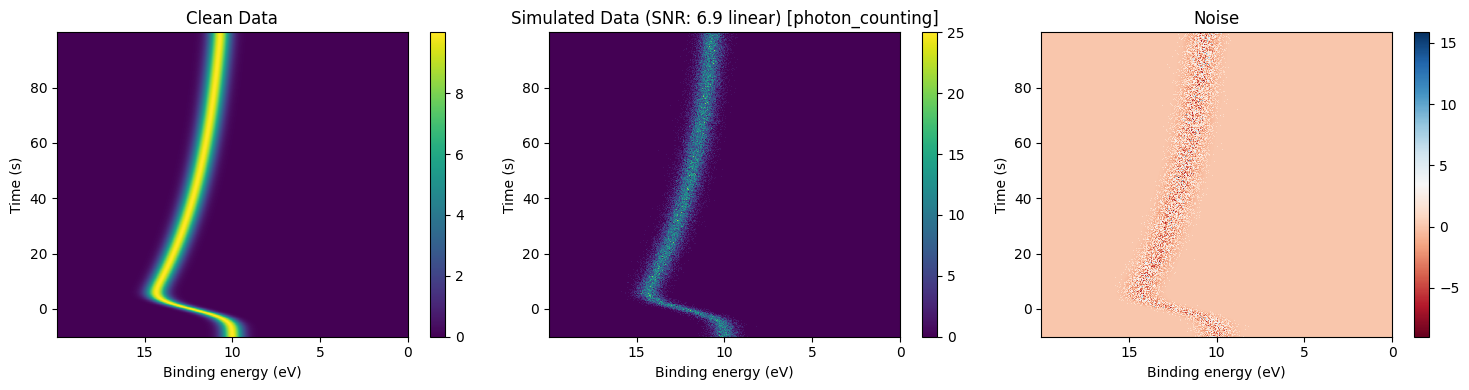

In [19]:
# Simulate a 2D dataset
sim_dat2D = sim.simulate_2D()
sim.plot_comparison(dim=2)

In [ ]:
# Simulate a number (N) of 2D datasets and save in a hdf5 file
[clean_data, noisy_data_list, noise_list] = sim.simulate_N(N=100)
sim.save_data(N_data=noisy_data_list, file_name='simulated_data.h5')

Generating clean data from model... Done
Generated 100 noisy datasets successfully
Data saved to: c:\Users\jmahl\OneDrive\Documents\GitHub\time-resolved-spectroscopy-fit\examples\simulator\simulated_data\simulated_data.h5


In [ ]:
# If you want to modify the model:
# 1) reset models (free up name associated with current model)
# 2) Restart the Jupyter Notebook and start from the top cell
file.reset_models()